In [2]:
#Lucas Ross 31 Jan 2023

#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
#set row and col preferences
pd.set_option("display.max_columns", None) #no limit on columns displayed
pd.set_option("display.max_rows", 200)

df = pd.read_csv("data.csv")
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,8

In [4]:
def searchcol(s): #search for columns of strings where the string contains s
    cols = [] #get the names of columns with s in the values
    for colname in df.columns:
        if df[colname].astype(str).str.contains(s).any(): #.any() allows boolean to apply to any of the rows
            cols.append(colname)
    return cols

In [5]:
def euro_to_num(val): #this function will clean up money columns
    if isinstance(val, str):
        mult = 1
        if val.endswith("K"):
            mult = 1000
        if val.endswith("M"):
            mult = 1000000
        return float(val.replace("€", "").replace("K", "").replace("M", "")) * mult
    else:
        return np.nan

moneycols = searchcol("€")

for col in moneycols:
    df[col] = df[col].apply(euro_to_num)

df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [6]:
def pos_to_num(val): #converts position AA+B to number AA
    if isinstance(val, str):
        return float(val.split("+")[0])
    else:
        return np.nan

poscols = searchcol("\+")

for col in poscols:
    df[col] = df[col].apply(pos_to_num) #apply() applies function to each row in column

df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [7]:
#you can also use a dictionary to organize columns and their functions
#helps reduce bugs

def height_to_num():
    pass

def weight_to_num():
    pass

transforms = {
    "Height": height_to_num,
    "Weight": weight_to_num
}

for k,v in transforms.items(): #items returns each set of vals in pairs (k, v)
    df[k] = df[k].map(v) #map applies a function (like apply())

TypeError: height_to_num() takes 0 positional arguments but 1 was given

In [ ]:
#converting Joined (what yr the player joined the org) to datetime object and adding year
df["Joined"] = pd.to_datetime(df["Joined"])
df["Joined year"] = df["Joined"].dt.year #adding a feature thats just a year
print(min(df["Joined"]), max(df["Joined"]))
df["Joined"].head()

1991-06-01 00:00:00 2018-12-20 00:00:00


0   2004-07-01
1   2018-07-10
2   2017-08-03
3   2011-07-01
4   2015-08-30
Name: Joined, dtype: datetime64[ns]

In [ ]:
#work rate is in the format "atk/def"
#str.split() doesnt actually affect df, it makes a new df
workrate = df["Work Rate"].str.split("/ ", n=1, expand=True) #n = number of splits, expand = multiple cols?
workrate.head(10)

,0,1
0,Medium,Medium
1,High,Low
2,High,Medium
3,Medium,Medium
4,High,High
5,High,Medium
6,High,High
7,High,Medium
8,High,Medium
9,Medium,Medium


In [ ]:
#drop() removes a column/row (axis = 1 means remove column)
df.drop(["Work Rate"], axis=1, inplace=True) #inplace = True --> edits are made directly to df

In [ ]:
#lets compress the position cols by only making 3 cols with the mean val of each category
postype = {
    "atk":["LS", "ST", "RS", "LF", "CF", "RF"],
    "mid":["LW", "RW", "LAM", "CAM", "RAM", "LM", "RM", "CM" ,"RCM", "LCM", "CDM", "RDM", "LDM"],
    "def":["LWB", "RWB", "LB", "LCB", "CB", "RCB", "RB"]
}
allpos = ["LS", "ST", "RS", "LF", "CF", "RF", "LW", "RW", "LAM", \
    "CAM", "RAM", "LM", "RM", "CM" ,"RCM", "LCM", "CDM", "RDM", "LDM", \
    "LWB", "RWB", "LB", "LCB", "CB", "RCB", "RB"] #all positions

#iterate through dictionary
for category, col in postype.items():
    df[category + "rate"] = round(df[col].mean(axis=1)) #gets the mean for every value of each col

#now lets drop all the other columns
for i in allpos:
    df.drop([i], axis=1, inplace=True)

#check the shape!
df.shape
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,atkrate,midrate,defrate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,90.0,83.0,55.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,90.0,80.0,59.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,86.0,80.0,56.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,NaN,NaN,NaN
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,84.0,85.0,71.0
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,86.0,81.0,57.0
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,80.0,85.0,76.0
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0,87.0,80.0,66.0
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,72.0,75.0,84.0
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0,NaN,NaN,NaN


In [ ]:
summarytype = {
'Passing': ['Crossing', 'ShortPassing', 'LongPassing'],
'Shooting': ['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties', 'HeadingAccuracy'],
'Defending': ['Marking', 'StandingTackle', 'SlidingTackle', 'Interceptions'],
'Speed': ['SprintSpeed', 'Agility', 'Acceleration', 'Reactions', 'Stamina'],
'Control': ['BallControl', 'Curve', 'Dribbling'],
'Goalkeeping': ['GKDiving', 'GKHandling', 'GKPositioning','GKKicking', 'GKReflexes', 'Vision', 'Aggression', 'Positioning'],
'Mental': ['Composure'],
'Power': ['Strength', 'Balance', 'Jumping'],
'AvgRating': ['Overall', 'Potential']
}

pcols = [
    'Crossing', 'ShortPassing', 'LongPassing', \
    'Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties', 'HeadingAccuracy', \
    'Marking', 'StandingTackle', 'SlidingTackle', 'Interceptions', \
    'SprintSpeed', 'Agility', 'Acceleration', 'Reactions', 'Stamina', \
    'BallControl', 'Curve', 'Dribbling', \
    'GKDiving', 'GKHandling', 'GKPositioning','GKKicking', 'GKReflexes', 'Vision', 'Aggression', 'Positioning', \
    'Composure', \
    'Strength', 'Balance', 'Jumping', \
    'Overall', 'Potential'
    ]

#iterate through dictionary
for category, col in summarytype.items():
    df[category] = round(df[col].mean(axis=1)) #gets the mean for every value of each col

#now lets drop all the other columns
for i in pcols:
    df.drop([i], axis=1, inplace=True)

#check the shape!
df.shape
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Club,Club Logo,Value,...,Release Clause,Passing,Shooting,Defending,Speed,Control,Goalkeeping,Mental,Power,AvgRating
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,...,226500000.0,87.0,86.0,27.0,87.0,95.0,36.0,96.0,74.0,94.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,...,127100000.0,81.0,88.0,28.0,90.0,88.0,37.0,95.0,81.0,94.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,...,228100000.0,80.0,80.0,30.0,91.0,93.0,36.0,94.0,65.0,92.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,...,138600000.0,39.0,21.0,20.0,62.0,27.0,70.0,68.0,58.0,92.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,...,196400000.0,92.0,80.0,60.0,83.0,87.0,39.0,88.0,72.0,92.0
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93000000.0,...,172100000.0,84.0,79.0,31.0,90.0,91.0,34.0,91.0,72.0,91.0
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,67000000.0,...,137400000.0,89.0,75.0,73.0,85.0,89.0,36.0,84.0,73.0,91.0
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,80000000.0,...,164000000.0,74.0,85.0,46.0,85.0,88.0,52.0,85.0,78.0,91.0
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,51000000.0,...,104600000.0,74.0,72.0,90.0,80.0,74.0,32.0,82.0,81.0,91.0
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,68000000.0,...,144500000.0,23.0,14.0,19.0,59.0,14.0,68.0,70.0,68.0,92.0


In [ ]:
display = 10
for col in df.dtypes[df.dtypes == "object"].index: #only get cols with object data type
    count = df[col].value_counts(dropna=False) #value_counts() counts number of occurences of each value (including na)
    print(count[:display])
    if len(count) > display:
        print(f"displaying only first {display} of {len(count)} values")

'''
there are invalid values!

Normal                 10595
Lean                    6417
Stocky                  1140
NaN                       48
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Name: Body Type, dtype: int64
'''

J. Rodríguez    11
Paulinho         8
R. Williams      7
J. Williams      7
J. Gómez         6
Felipe           6
J. Valencia      6
J. Hernández     6
J. Martínez      5
M. Pedersen      5
Name: Name, dtype: int64
displaying only first 10 of 17194 values
https://cdn.sofifa.org/players/4/19/158023.png    1
https://cdn.sofifa.org/players/4/19/245008.png    1
https://cdn.sofifa.org/players/4/19/169489.png    1
https://cdn.sofifa.org/players/4/19/232465.png    1
https://cdn.sofifa.org/players/4/19/228625.png    1
https://cdn.sofifa.org/players/4/19/227857.png    1
https://cdn.sofifa.org/players/4/19/225809.png    1
https://cdn.sofifa.org/players/4/19/209425.png    1
https://cdn.sofifa.org/players/4/19/172560.png    1
https://cdn.sofifa.org/players/4/19/199442.png    1
Name: Photo, dtype: int64
displaying only first 10 of 18207 values
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        6

In [ ]:
#this lets us see the row with the invalid body type (result of human error)
df[df["Body Type"] == "PLAYER_BODY_TYPE_25"]

#df.loc[rows where column == x, column]
df.loc[df["Body Type"] == "PLAYER_BODY_TYPE_25", "Body Type"] = "Lean"
df.loc[df["Body Type"] == "Neymar", "Body Type"] = "Lean"

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Club,Club Logo,Value,...,Release Clause,Passing,Shooting,Defending,Speed,Control,Goalkeeping,Mental,Power,AvgRating
26,26,209331,M. Salah,26,https://cdn.sofifa.org/players/4/19/209331.png,Egypt,https://cdn.sofifa.org/flags/111.png,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,69500000.0,...,137300000.0,77.0,72.0,44.0,90.0,87.0,37.0,91.0,75.0,88.0


<AxesSubplot:title={'center':'after'}, xlabel='Release Clause', ylabel='Count'>

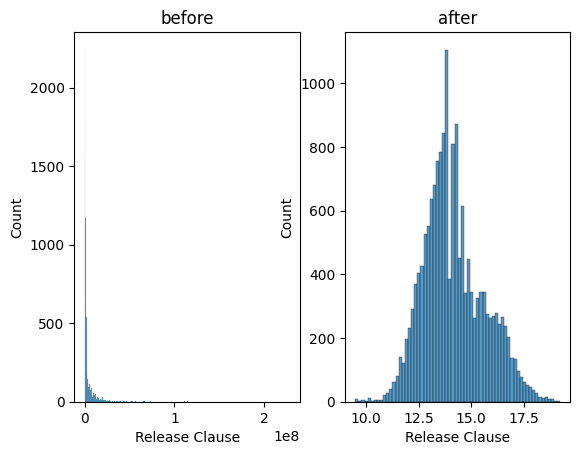

In [12]:
#log transformation: apply to a dataset to make it more normally distributed, used in data analysis to reduce outliers
plt.subplot(1, 2, 1)
plt.title("before")
sns.histplot(df["Release Clause"]) #if any values are negative, they cant be handled by the log transformation

plt.subplot(1, 2, 2)
releaselog = np.log(df["Release Clause"])
plt.title("after")
sns.histplot(releaselog)

#you could also use np.arcsinh(), which acts like np.log() but handles negative and zero values

In [ ]:
#binning: categorizing rows by a numerical attribute (continuous --> discrete)